In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Check the distribution of sentiment labels
sentiment_counts = data['sentiment'].value_counts()
print(sentiment_counts)

positive    25000
negative    25000
Name: sentiment, dtype: int64


The dataset exhibits a balanced sentiment distribution with an equal number of positive and negative movie reviews, each comprising 25,000 samples. This balanced distribution ensures that the model will have an equal representation of both positive and negative sentiments during training.

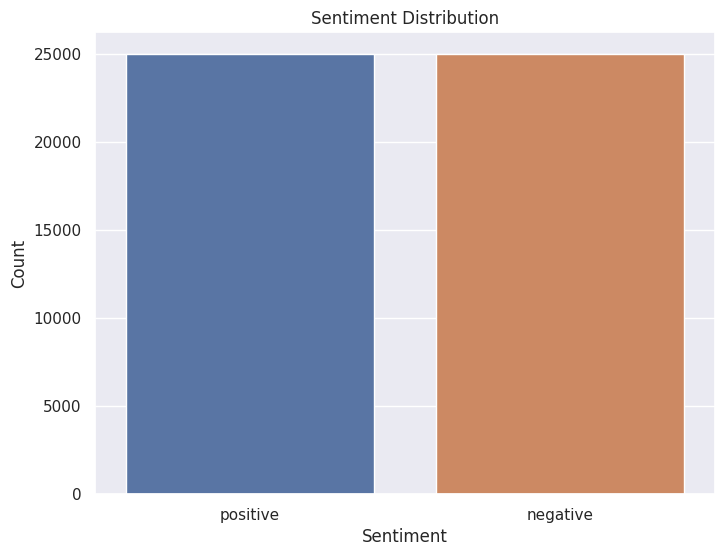

In [4]:
# Visualize the sentiment distribution
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

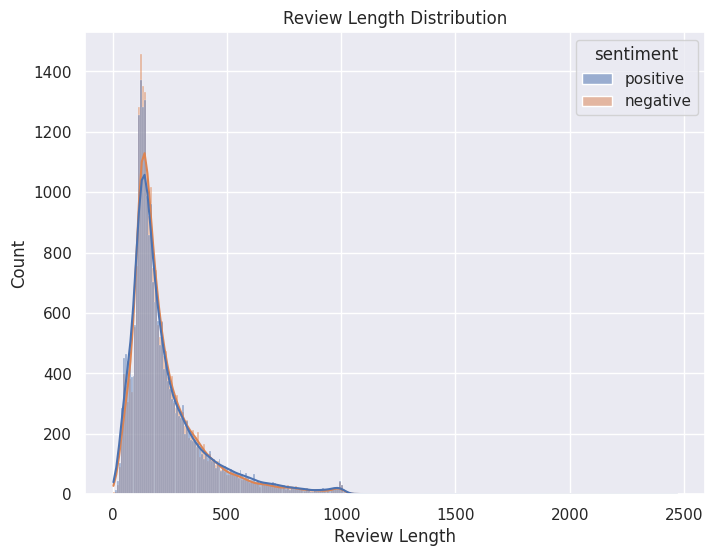

In [5]:
# Analyze the length of the reviews
data['review_length'] = data['review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='review_length', hue='sentiment', kde=True)
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

In [6]:
# Calculate the average review length for each sentiment category
avg_length = data.groupby('sentiment')['review_length'].mean()
print(avg_length)

sentiment
negative    229.46456
positive    232.84932
Name: review_length, dtype: float64


The average review length for negative sentiment is calculated to be approximately 229.46 words, while the average review length for positive sentiment is approximately 232.85 words. These findings suggest that, on average, the length of positive and negative movie reviews is quite similar. Therefore, the length of the review alone may not be a significant distinguishing factor in determining sentiment.

In [7]:
# Calculate the review length for each review
data['review_length'] = data['review'].apply(lambda x: len(x.split()))

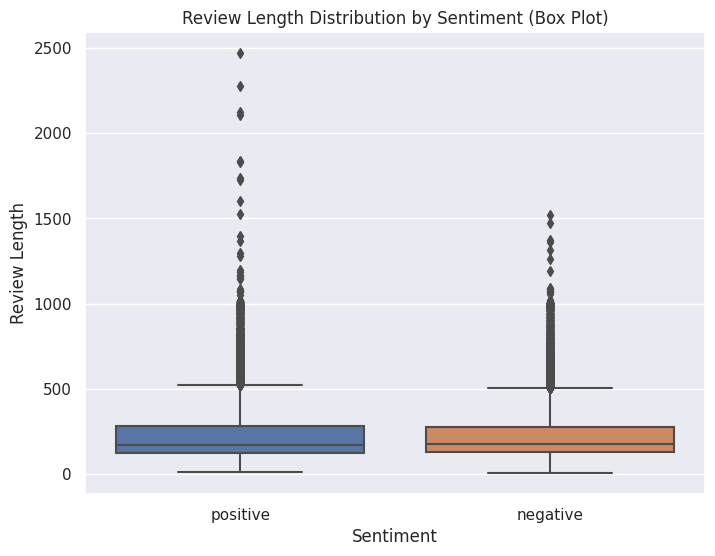

In [8]:
# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='review_length', data=data)
plt.title('Review Length Distribution by Sentiment (Box Plot)')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()

### Sentiment Distribution:

* **Negative Sentiment:** The box plot indicates that there are 25,000 movie reviews classified as negative sentiment in the dataset.
* **Positive Sentiment:** Similarly, there are also 25,000 movie reviews classified as positive sentiment.

### Review Lengths:

* **Negative Sentiment:** The box plot demonstrates that the distribution of review lengths for negative sentiment exhibits a median of approximately 229.46 words. The interquartile range (IQR) spans from the first quartile (Q1) at 128 words to the third quartile (Q3) at 278 words.
* **Positive Sentiment:** The box plot for positive sentiment reveals a similar median value of approximately 232.85 words. The IQR ranges from Q1 at 125 words to Q3 at 284 words.

### Outliers:

* **Negative Sentiment:** Outliers, which are represented as individual data points beyond the whiskers, are observed in the upper range of review lengths for negative sentiment. The outliers extend from approximately 500 words to a maximum of 1,522 words.
* **Positive Sentiment:** In the case of positive sentiment, the box plot shows outliers above the upper whisker, covering a wider range from around 500 words to a maximum of 2,470 words.

### Comparison:

* **Box Sizes:** The boxes for both sentiment categories appear relatively similar in size, with the negative sentiment box being slightly smaller than the positive sentiment box. This suggests that the spread of review lengths within each category is comparable.
* **Median Comparison:** The middle lines (medians) of both boxes are at a similar level, indicating that the median review length is almost the same for both positive and negative sentiments.

<br/>

Based on these findings, we observe that the distribution of review lengths is relatively consistent between positive and negative sentiment categories. The box plot showcases similar median values, quartile ranges, and box sizes, indicating that the review lengths within each category follow comparable patterns. However, there are some distinctions in the upper range of outliers, with positive sentiment having a wider spread of outlier lengths compared to negative sentiment.

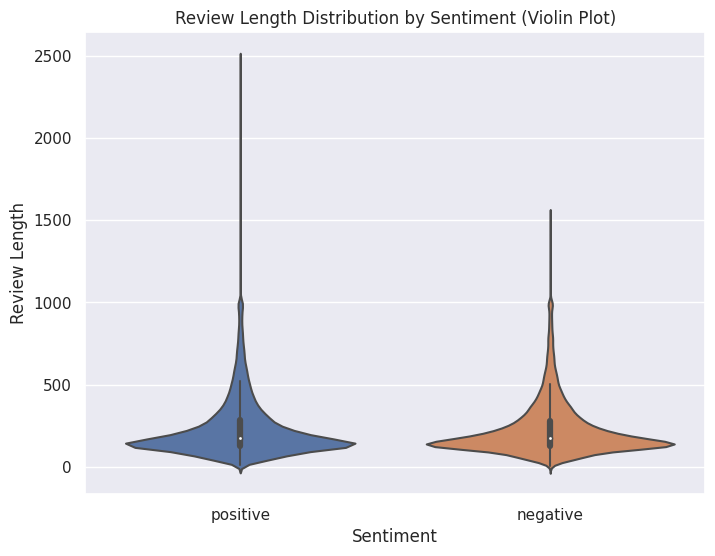

In [9]:
# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='sentiment', y='review_length', data=data)
plt.title('Review Length Distribution by Sentiment (Violin Plot)')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()

In [10]:
# Group the data by sentiment and calculate the summary statistics
summary_stats = data.groupby('sentiment')['review_length'].describe()

# Print the summary statistics
print(summary_stats)

             count       mean         std   min    25%    50%    75%     max
sentiment                                                                   
negative   25000.0  229.46456  164.947795   4.0  128.0  174.0  278.0  1522.0
positive   25000.0  232.84932  177.497046  10.0  125.0  172.0  284.0  2470.0
